<div style="text-align:center"><span style="color:#800000; font-family:Georgia; font-size:2.4em;"> Proyecto de Aplicación Profesional </span></div>

<img style="float: right; margin: auto;" src="https://www.ambulante.org/wp-content/uploads/2019/03/logos_web_Jalisco_ITESOJesuita.png" width="350" height="220" />

> <b> <p style = "font-family: Palatino; font-size:0.8em; color: #008080;" > Métrica de Precios </p> <b/>

<i> <p style = "font-family: Calibri Light; font-size:1.1em;color:black;"> Caracteristicas de Series de Tiempo </p> <i/>

<span style="color:#004A94; font-family:Georgia; font-size:1.7em;"> Box-Jenkins Method </span> [LINK]('https://machinelearningmastery.com/gentle-introduction-box-jenkins-method-time-series-forecasting/')


The approach starts with the assumption that the process that generated the time series can be approximated using an ARMA model if it is stationary or an ARIMA model if it is non-stationary.

- **Identification.** Use the data and all related information to help select a sub-class of model that may best summarize the data.
> 1. Assess whether the time series is stationary, and if not, how many differences are required to make it stationary.
>> **1.1 Differencing**
>> - Unit Root Tests. Use unit root statistical tests on the time series to determine whether or not it is stationary. Repeat after each round of differencing.
>> - Avoid over differencing. Differencing the time series more than is required can result in the addition of extra serial correlation and additional complexity.
>>
>> **1.2 Configuring AR and MA**
>> - Autocorrelation Function (ACF). The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coefficient between -1 and 1 for negative and positive correlation.
>> - Partial Autocorrelation Function (PACF). The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.
> 2. Identify the parameters of an ARMA model for the data.
>> Estimation involves using numerical methods to minimize a loss or error term.

- **Estimation.** Use the data to train the parameters of the model (i.e. the coefficients).
> Estimation involves using numerical methods to minimize a loss or error term.

- **Diagnostic Checking.** Evaluate the fitted model in the context of the available data and check for areas where the model may be improved
> To look for evidence that the model is not a good fit for the data.
>> **3.1 Overfitting** 
>> - The first check is to check whether the model overfits the data. Generally, this means that the model is more complex than it needs to be and captures random noise in the training data.
>> - This is a problem for time series forecasting because it negatively impacts the ability of the model to generalize, resulting in poor forecast performance on out of sample data.
>>
>> **3.2 Residual Errors**
>> - A review of the distribution of errors can help tease out bias in the model. The errors from an ideal model would resemble white noise, that is a Gaussian distribution with a mean of zero and a symmetrical variance.
>> - For this, you may use density plots, histograms, and Q-Q plots that compare the distribution of errors to the expected distribution. A non-Gaussian distribution may suggest an opportunity for data pre-processing. A skew in the distribution or a non-zero mean may suggest a bias in forecasts that may be correct.


<img src="https://i.stack.imgur.com/5rqlo.png"  />

In [1]:
# Importar librerias y funciones
import datos as dat
import entradas as ent
# --------------------------- #
import numpy as np
from statsmodels.tsa.stattools import  adfuller #prueba de estacionariedad
from statsmodels.tsa.stattools import pacf,acf
from statsmodels.stats.diagnostic import het_arch
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import pandas as pd

- Se trabajará con las diferencias de los precios para tener los datos en porcentajes y se puedan comparar entre productos (diferencias de productos)
- Se agrupa por clase sacando la media de todo el conjunto (se descartó la mediana)
> - Se enseñará en el dash por grupos(15), pero a su vez el analisis es por clases (32)
> - Esto quiere decir que se intenta analizar 32 series de tiempo (de sep 2018 a mayo 2020)
- Función BoxJenkins automatizada
> - Checar estacionariedad

In [2]:
# Leer datos
df_prices_or = dat.read_file(ent.path_data_prices, ent.sheet_data_prices)

# Limpiar base de datos
df_prices = dat.clean_data_prices(df_prices_or)

df_prices.head()

,División,Grupo,Clase,Generico,Especificación,sep 2018,oct 2018,nov 2018,dic 2018,ene 2019,...,ago 2019,sep 2019,oct 2019,nov 2019,dic 2019,ene 2020,feb 2020,mar 2020,abr 2020,may 2020
0,"Alimentos, bebidas y tabaco",Alimentos,"Pan, tortillas y cereales",Arroz,"VERDE VALLE, BLANCO, SUPER EXTRA, BOLSA DE 1 KG",0.000000,0.000000,-0.015417,-0.016081,0.032258,...,0.000000,0.000000,0.000000,0.000000,0.016064,0.047431,0.000000,0.00000,0.000000,0.077358
1,"Alimentos, bebidas y tabaco",Alimentos,"Pan, tortillas y cereales",Arroz,"PROGRESO, BLANCO, SUPER EXTRA, BOLSA DE 1 KG",0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.00000,0.040000,0.235769
2,"Alimentos, bebidas y tabaco",Alimentos,"Pan, tortillas y cereales",Arroz,"BLANCO, SUPER EXTRA, SINALOA, BOLSA DE 1 KG",0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.250000,0.177778
3,"Alimentos, bebidas y tabaco",Alimentos,"Pan, tortillas y cereales",Arroz,"SCHETTINO, BLANCO, SUPER EXTRA, BOLSA DE 900 GR",0.000000,-0.112486,0.147655,-0.021535,0.017494,...,0.000000,0.000000,-0.013805,-0.004479,0.000000,0.000000,0.000000,0.01856,0.000000,0.000000
4,"Alimentos, bebidas y tabaco",Alimentos,"Pan, tortillas y cereales",Arroz,"PRECISSIMO, BLANCO, LARGO, BOLSA DE 900 GR",0.006662,0.021840,0.000000,-0.007124,-0.010437,...,-0.067633,-0.048575,0.008169,-0.035787,0.027311,-0.026585,0.017507,-0.01927,0.145965,0.259032


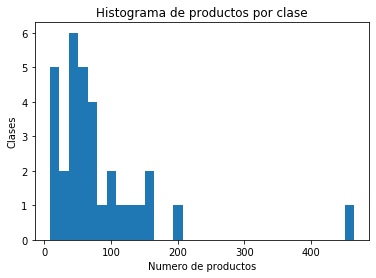

In [3]:
# Agrupar por clase
clases = list(df_prices.groupby('Clase'))

num = [len(clases[i][1]) for i in range(len(clases))]

plt.hist(num, bins=32)
plt.title('Histograma de productos por clase')
plt.xlabel('Numero de productos')
plt.ylabel('Clases')
plt.show()

En la clase Accesorios y utensilios se tienen 152 productos 

De los cuales en la fecha "sep 2018" : 116 son 0


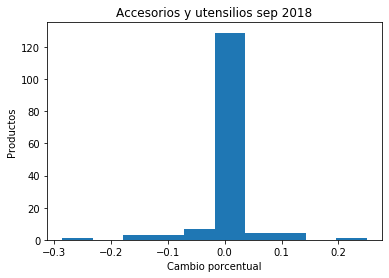

In [4]:
# Ejemplo de la primera clase
cl = 0
print('En la clase '+ clases[cl][0] + ' se tienen '+ str(num[cl]) + ' productos \n')

# DataFrame de clase cl
clase1 = clases[cl][1]
# Tomar una fecha para ver el hisograma de todos los productos en esa clase
fecha = 'sep 2018'

# cuantos son igual a ceo
temp = clase1[fecha][clase1[fecha]==0]
print('De los cuales en la fecha "' + fecha + '" : ' + str(len(temp)) + ' son "0"')


plt.hist(clase1[fecha])
plt.title(clases[cl][0] + ' ' + fecha)
plt.xlabel('Cambio porcentual')
plt.ylabel('Productos')
plt.show()

In [5]:
# Todas las series de tiempo por clase
series_tiempo = [clases[i][1].mean().rename(clases[i][0], inplace=True) for i in range(len(clases))]

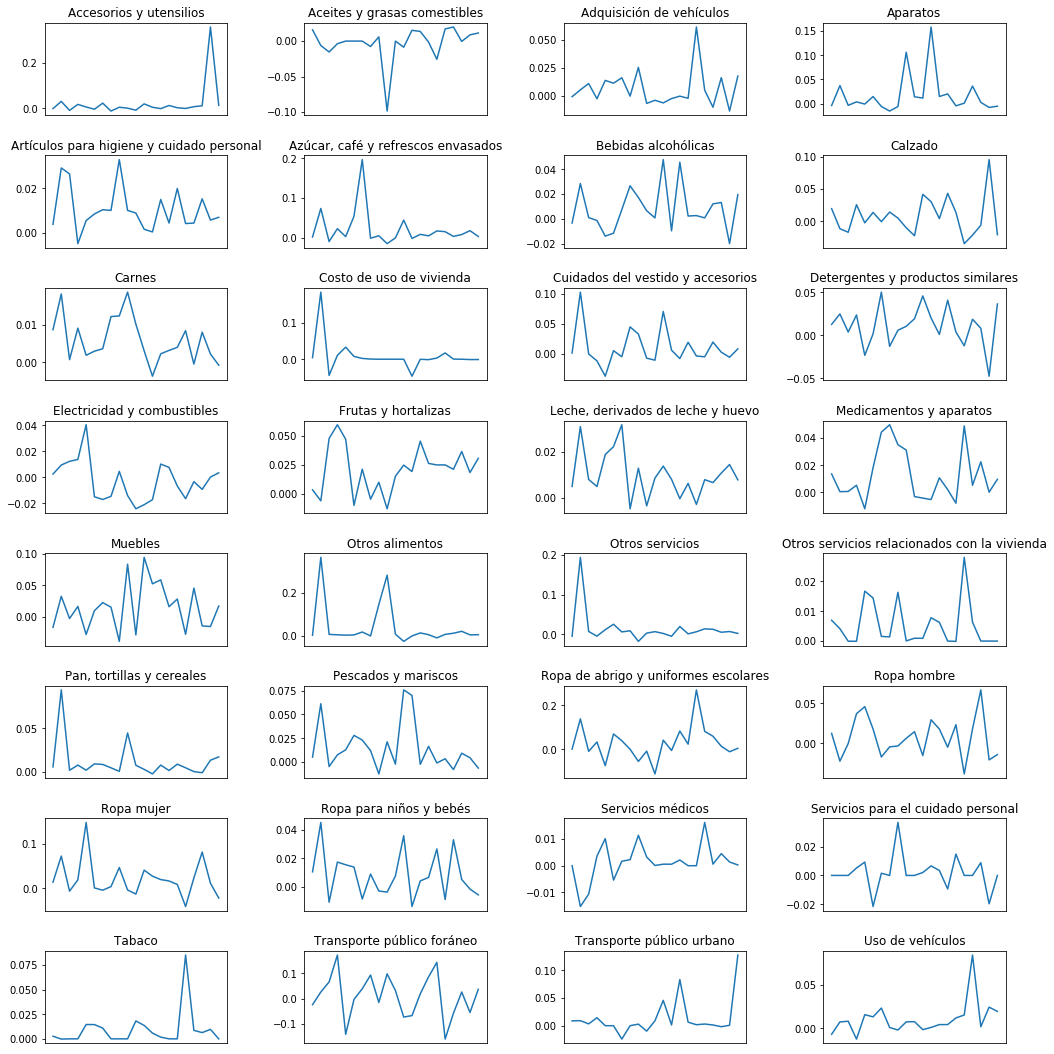

In [6]:
# Graficas de todas las series de tiempo
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
for num in range(1,33):
    #df0=series_tiempo[num-1]
    ax = fig.add_subplot(8,4,num)
    ax.plot(series_tiempo[num-1])
    ax.set_title(clases[num-1][0])
    ax.get_xaxis().set_visible(False)

plt.tight_layout(pad=2.0)
plt.show()

In [7]:
# Tomar una serie de tiempo de las 32 para analizar con Box-Jenkins
serie_tiempo_1 = series_tiempo[0]
serie_tiempo_1.head()

sep 2018   -0.001324
oct 2018    0.030668
nov 2018   -0.009033
dic 2018    0.017452
ene 2019    0.005927
Name: Accesorios y utensilios, dtype: float64

<span style="color:#516D6E; font-family:Georgia; font-size:1.4em;"> Prueba de estacionariedad </span>

Una serie de tiempo es estacionaria cuando la media y la variabilidad se mantienen constantes a lo largo del tiempo, es decir, no es en función del tiempo; y además, no presenta tendencia

-----

<span style="color:#29AECE; font-family:Georgia; font-size:1.2em;"> Prueba de  Dicky-Fuller aumentada </span> - [LINK]('https://es.wikipedia.org/wiki/Prueba_de_Dickey-Fuller_aumentada')

En estadística y econometría, una prueba de Dickey-Fuller aumentada (ADF) es una prueba de raíz unitaria para una muestra de una serie de tiempo. Es una versión aumentada de la prueba Dickey-Fuller para un conjunto más amplio y más complejo de modelos de series de tiempo. La estadística Dickey-Fuller Aumentada (ADF), utilizada en la prueba, es un número negativo. Cuanto más negativo es, más fuerte es el rechazo de la hipótesis nula de que existe una raíz unitaria para un cierto nivel de confianza

>Ho: No es estacionaria (tiene unit-root)
>
>Hi: Es estacionaria (No tiene raiz unitaria)

Aceptar Ho si: 
p_value > 0.05

- [adfuller]('https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html')

In [226]:
def check_stationarity_t(data):
    
    # Usar dicky fuller
    test_results = adfuller(data)
    
    # Cuando se cumple esto es estacionaria la serie orginal
    if test_results[0] < 0 and test_results[1] <= 0.05:
        lags = 0
        new_data = data
        
    # Cuando no se cumple se debe diferenciar para que sea estacionaria
    else:
        for i in range(3):
            
            # Diferenciar datos
            new_data = data.diff().dropna()
            
            # Volver a calcular test dicky fuller
            new_results = adfuller(new_data)
            
            # Volver a comparar para decidir si es o no estacionaria
            if new_results[0] < 0 and new_results[1] <= 0.05:
                #print('es estacionaria')
                lags = i
                break
            
            else:
                data = new_data
                #print('no es estacionaria')
                lags = 5
                
    # Regresa los datos diferenciados que son estacionarios
    return new_data

In [228]:
# Todas las series de tiempo estacionarias
data_est = [check_stationarity_t(data) for data in series_tiempo]


____
<span style="color:#29AECE; font-family:Georgia; font-size:1.2em;"> FAC y FAC Parcial </span>

En el caso de la autocorrelación parcial, nos indica el grado de correlación que exite entre la observaciones de un variable y cada uno de sus rezagos, consdierando rezagos intermedios. 

En el caso de la autocorrelación, esta función nos indica el grado de correlación que existe entre una observación de una variable con cada uno de sus rezagos, habiendo eliminado cualquier dependencia linear con los rezagos intermedios.

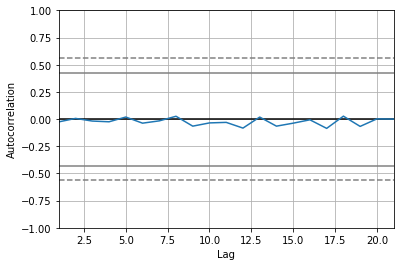

In [86]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(serie_tiempo_1)
plt.show()

**[FAC - grafica]('https://www.xlstat.com/es/soluciones/funciones/analisis-descriptivo-de-series-temporales')**

To give an idea of the degree of dependence between the values of a time series. The visualization of the ACF or of the partial autocorrelation function (PACF) helps to identify the suitable models to explain the past observations and to do predictions. The theory shows that the PACF function of an AR(p) – an autoregressive process of order p - is zero for lags greater than p.

In [95]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf, pacf, acf

def g_PQ(data):
    plt.figure(1,figsize=(10,8))
    plot_acf(data)
    plot_pacf(data)
    plt.show()


In [202]:
def autocorrelation(data):
    # Funcion de autocorrelacion
    fac = acf(data, fft=False)
    # Funcion de autocorrelacion parcial
    fac_p = pacf(data)
    # quitar nan
    answer_facp = fac_p[~np.isnan(fac_p)]
    return fac, answer_facp

In [203]:
s=5
fac, fac_p = autocorrelation(data_est[s])
fac

array([ 1.00000000e+00, -4.31676199e-01, -4.36858292e-02, -2.02649979e-02,
       -2.76559221e-01,  5.43978471e-01, -2.81385767e-01,  1.36073167e-02,
       -1.64840514e-02, -3.86578420e-02,  1.20826142e-01, -8.50991811e-02,
       -5.41044619e-03,  4.17429755e-02, -1.28736438e-02,  8.66264963e-04,
       -7.94653858e-03, -1.15608996e-02,  2.35749946e-02, -1.29915494e-02])

In [204]:
fac_p

array([ 1.        , -0.454396  , -0.3213708 , -0.27968492, -0.78211418,
       -0.01930077, -0.41686684, -0.54531806, -1.39758025,  2.15156059,
        0.32879349,  0.76881622, -0.48910865,  2.91659359,  1.22111378,
       -0.33147311,  0.68952717,  0.1138083 ,  0.69740406, -0.10846146])

In [120]:
temp = [len(autocorrelation(s)) for s in data_est]

<Figure size 720x576 with 0 Axes>

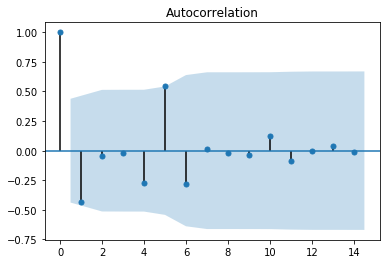

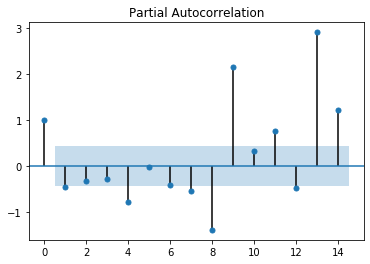

- - -


In [198]:
g_PQ(data_est[s])
print('- - -')
#g_PQ(series_tiempo[s])

‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.


**ARIMA model in words:**


Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

In [179]:

from statsmodels.tsa.arima_model import ARIMA
def fit_arima(data):
    d = 1
    # lambda para tomar los coef significativos
    significant_coef = lambda x: x if x>0.5 else None
    # Calcular coeficientes de fac parcial
    facp = pacf(data)
    # Pasar lambda y quitar los que no son significativos
    p_s = pd.DataFrame(significant_coef(facp[i]) for i in range(len(facp))).dropna()
    # Tomar el primero que sea signiticativo, sera la p de nuestro modelo
    p = p_s.index[0] + 1

    # Calcular coeficientes de fac 
    fac = acf(data)
    # Pasar lambda y quitar los que no son significativos
    q_s = pd.DataFrame(significant_coef(fac[i]) for i in range(len(fac))).dropna()
    # Tomar el primero que sea signiticativo, sera la p de nuestro modelo
    q = q_s.index[0] + 1
    print(p,d,q)
    model = ARIMA(data,order=(p,d,q))
    model_fit = model.fit(disp=0)
    return model_fit

In [180]:
#temp = [fit_arima(s) for s in data_est]
temp = fit_arima(data_est[0])

1 1 1


C:\Users\sally\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sally\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [181]:
temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.Accesorios y utensilios   No. Observations:                   20
Model:                        ARIMA(1, 1, 1)   Log Likelihood                  22.468
Method:                              css-mle   S.D. of innovations              0.073
Date:                       Wed, 24 Jun 2020   AIC                            -36.935
Time:                               08:53:46   BIC                            -32.952
Sample:                                    1   HQIC                           -36.158
                                                                                     
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0043      0.002      1.792      0.091      -0.000       0.009
ar.L1.D.Accesorios y utensilios    -0.1197      0.223     -0.535      0.599      -0.558       0.318
ma.L1.D.Accesorios y utensilios    -0.9999      0.210     -4.765      0.000      -1.411      -0.589
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -8.3574           +0.0000j            8.3574            0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [233]:
p_v = temp.pvalues
p_v.index


Index(['const', 'ar.L1.D.Accesorios y utensilios',
       'ma.L1.D.Accesorios y utensilios'],
      dtype='object')

# Residuales

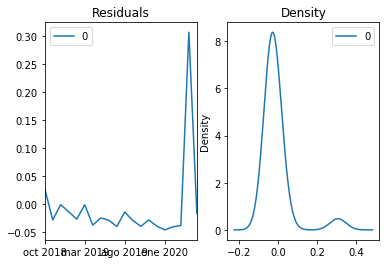

In [183]:
# Plot residual errors
residuals = pd.DataFrame(temp.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [218]:
residuals

,0
oct 2018,0.027734
nov 2018,-0.028432
dic 2018,-0.001259
ene 2019,-0.014050
feb 2019,-0.027129
mar 2019,-0.001432
abr 2019,-0.037749
may 2019,-0.024937
jun 2019,-0.029084
jul 2019,-0.040229


<span style="color:#29AECE; font-family:Georgia; font-size:1.2em;"> Prueba de Shapiro-Wilk </span>

Esta prueba es una de las muchas pruebas que permiten estimar si una variable sigue una distribución normal o no. Para esta prueba tenemos el siguiente conjunto de hipotesis :

$H_0$: la muestra evaluada proviene de una población normal, tal que $x_t \thicksim (\mu,\sigma^2)$ 

$H_a$: la muestra evaluada no proviene de una población normal.

In [234]:
def norm_test(data):

    n_test=shapiro(data)
    test_results = { 'Test statistic':n_test[0],
                    'P-value':n_test[1] #si el p-value de la prueba es menor a alpha, rechazamos H0
    }
    return test_results

norm_test(residuals)

{'Test statistic': 0.4270362854003906, 'P-value': 7.419457404012064e-08}

In [236]:
import scipy.stats as st
def Normal_Test(data):
    print(st.mstats.normaltest(data))
    
Normal_Test(residuals)

NormaltestResult(statistic=masked_array(data=[47.54288090188299],
             mask=[False],
       fill_value=1e+20), pvalue=array([4.74454517e-11]))


Como en cualquier test de hipotesis, la hipotesis nula se rechaza cuando el valor del estadístico supera un cierto valor crítico que se obtiene de una tabla de probabilidad. En la mayoría de los paquetes estadísticos, como el SPSS, aparece programado dicho procedimiento, y proporciona tanto el valor del test como el p-valor correspondiente.

Se utilizará un nivel de confianza del 95% y nivel de significancia del 5%

Donde:

- Hipótesis Nula Ho: es que el conjunto de datos siguen una distribución normal.

- Hipótesis Alternativa H1: es que no sigue una distribución normal.

Este test se basa en evaluar un estadístico:

Con la finalidad de aprovechar los resultados que arroja el paquete estadístico con el que se procesan los datos, se utiliza el criterio de nivel de significancia observado (p-value)

Si p-value es menor que el nivel de significancia -> rechazar la hipotesis nula.

Si p value es mayor que el nivel de significancia -> entonces no hay elementos suficientes en la muestra para rechazar la hipotesis nula.

In [237]:
def Kolmogorov_Test(serie):
    param = st.norm.fit(serie)
    D, p = st.kstest(serie, 'norm', args=param)
    print("p value for " + 'norm' + " = "+str(p))
Kolmogrov_Test(residuals)



p value for norm = 1.934418731260453e-99


<span style="color:#516D6E; font-family:Georgia; font-size:1.4em;"> Prueba de Heterocedasticidad  </span>

Es importante conocer si una serie de tiempo es heterocedástica ya que, por ejemplo, si dicha serie de tiempo presentase esta propiedad, un modelo ARIMA no sería una buena propueta para intentar describir y pronosticar el comportamiento de la varible estudiada.  

Para detectar esto, procederemos a utilizar la prueba ARCH (autoregressive conditional heteroskedasticity) con los datos a los que les fue aplicada una diferencia. Para efectos de la prueba, consideraremos, como en el caso de la prueba de estacionariedad, un ${\alpha}=0.05$.

In [239]:
def arch_test(data):
    test = het_arch(data)
    p_value = test[1]
    return p_value

In [243]:
arch_test(residuals[0])


0.43681065480421416

In [ ]:
def check_resid(model_fit):
    # estadístico Ljung – Box. 
    ans = acorr_ljungbox(model_fit.resid, lags=[10])
    return ans

Cosas por hacer:

- Eliminar serie de tiempo de calzado
- Seasonal tests
- Hacer mas de un modelo arima
- Checar significancia de parametros
- Tres test para los residuales: normalidad, heteroscedasticidad, colinealidad
